In [1]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
%matplotlib inline
from yellowbrick.features import ParallelCoordinates

In [3]:
import seaborn as sns

In [4]:
df = pd.read_excel('./data_for_visualization.xlsx')

In [3]:
df['Age'] = df['Age'].replace({'U':None})

0 AxesSubplot(0.125,0.536818;0.352273x0.343182)
1 AxesSubplot(0.547727,0.536818;0.352273x0.343182)
2 AxesSubplot(0.125,0.125;0.352273x0.343182)
3 AxesSubplot(0.547727,0.125;0.352273x0.343182)


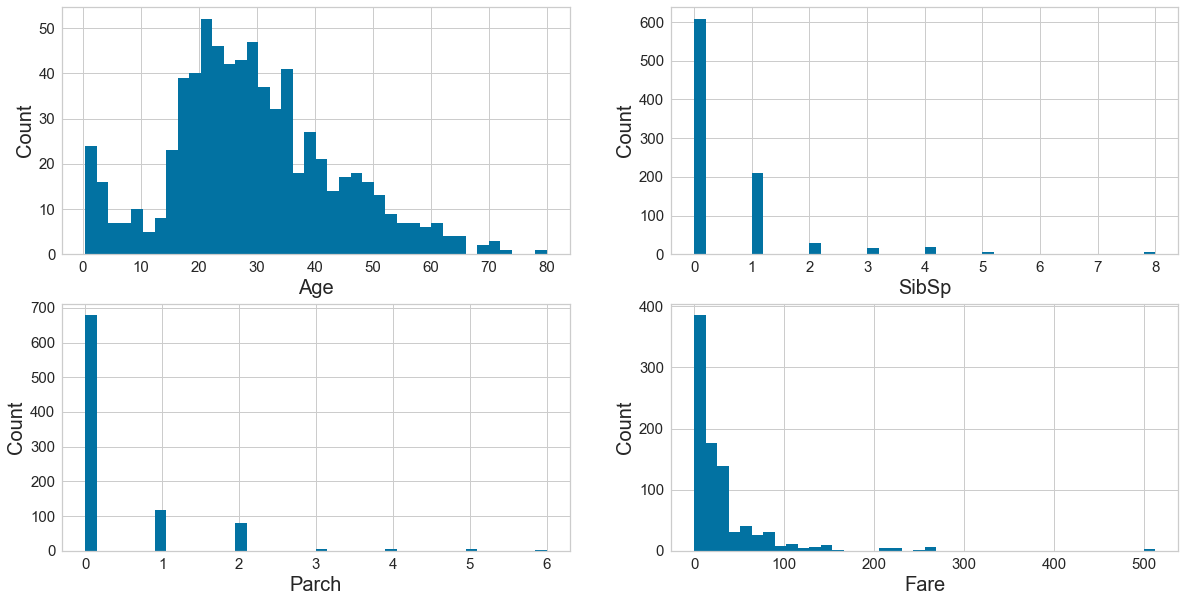

In [4]:
plt.rcParams['figure.figsize'] = (20, 10) # set up the figure size
fig, axes = plt.subplots(nrows = 2, ncols = 2) # make subplots
num_features = ['Age','SibSp', 'Parch', 'Fare']
xaxes = num_features
yaxes = ['Count', 'Count', 'Count', 'Count']
axes = axes.ravel() # draw histograms 
for idx, ax in enumerate(axes):
    print(idx,ax)
    ax.hist(df[num_features[idx]].dropna(), bins=40)
    ax.set_xlabel(xaxes[idx], fontsize=20)
    ax.set_ylabel(yaxes[idx], fontsize=20)
    ax.tick_params(axis='both', labelsize=15) # plt.show() and plt.close()

In [5]:
df['Cabin_label'] = df['Cabin_label'].replace('U','Unknown')
df['Age'] = df['Age'].fillna('Unknown')

In [5]:
df.head()

,ID,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Cabin_label
0,0,0,3,Mr,male,22,1,0,1,7.2500,0,S,U
1,1,1,1,Mrs,female,38,1,0,2,71.2833,1,C,C
2,2,1,3,Miss,female,26,0,0,1,7.9250,0,S,U
3,3,1,1,Mrs,female,35,1,0,2,53.1000,1,S,C
4,4,0,3,Mr,male,35,0,0,1,8.0500,0,S,U


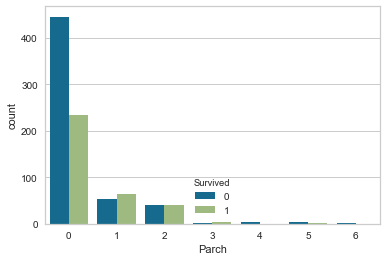

In [28]:
sns.countplot(x='Parch',data=df,hue='Survived')

In [7]:
df['Family_size'] = df['SibSp']+df['Parch']

In [8]:
Title_dic = {}
Title_dic.update(dict.fromkeys(['Capt', 'Col', 'Major', 'Dr', 'Rev'], 'Officer'))
Title_dic.update(dict.fromkeys(['Don', 'Sir', 'the Countess','Dona','Lady'], 'Royalty'))
Title_dic.update(dict.fromkeys(['Mme','Ms','Mrs'],'Mrs'))
Title_dic.update(dict.fromkeys(['Mlle','Miss'],'Miss'))
Title_dic.update(dict.fromkeys(['Mr'],'Mr'))
Title_dic.update(dict.fromkeys(['Master','Jonkheer'],'Master'))

df['Title_group'] = df['Name'].str.strip().map(Title_dic)

In [117]:
def group(x):
    if x >4:
        return 2
    elif x > 2:
        return 1
    else:
        return 0

# df['Ticket'] = pd.DataFrame(df['Ticket'].map(dict(df['Ticket'].value_counts())))
df['Ticket_group'] = df['Ticket'].apply(group)
# df.loc[:,['Ticket_group','Ticket']]

In [10]:
def Fare(x):

    if x>100.0:
        return 3
    elif x>30.0:
        return 2
    elif x>10.0:
        return 1
    else:
        return 0

    
df['Fare_group'] = df['Fare'].apply(Fare)

In [9]:
def Age_1(x):
    try:
        if x>60:
            return 6
        elif x>50:
            return 5
        elif x>40:
            return 4
        elif x>30:
            return 3
        elif x>20:
            return 2
        elif x>10:
            return 1
        else:
            return 0
    except:
        return -1
    
df['Age_group'] = df['Age'].apply(Age_1)

In [11]:
df

,ID,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Cabin_label,Family_size,Title_group,Age_group,Fare_group
0,0,0,3,Mr,male,22,1,0,1,7.2500,0,S,Unknown,1,Mr,2,0
1,1,1,1,Mrs,female,38,1,0,2,71.2833,1,C,C,1,Mrs,3,2
2,2,1,3,Miss,female,26,0,0,1,7.9250,0,S,Unknown,0,Miss,2,0
3,3,1,1,Mrs,female,35,1,0,2,53.1000,1,S,C,1,Mrs,3,2
4,4,0,3,Mr,male,35,0,0,1,8.0500,0,S,Unknown,0,Mr,3,0
5,5,0,3,Mr,male,Unknown,0,0,1,8.4583,0,Q,Unknown,0,Mr,-1,0
6,6,0,1,Mr,male,54,0,0,2,51.8625,1,S,E,0,Mr,5,2
7,7,0,3,Master,male,2,3,1,5,21.0750,0,S,Unknown,4,Master,0,1
8,8,1,3,Mrs,female,27,0,2,3,11.1333,0,S,Unknown,2,Mrs,2,1
9,9,1,2,Mrs,female,14,1,0,2,30.0708,0,C,Unknown,1,Mrs,1,2


Sex
{1: 233, 0: 81}
{0: 468, 1: 109}


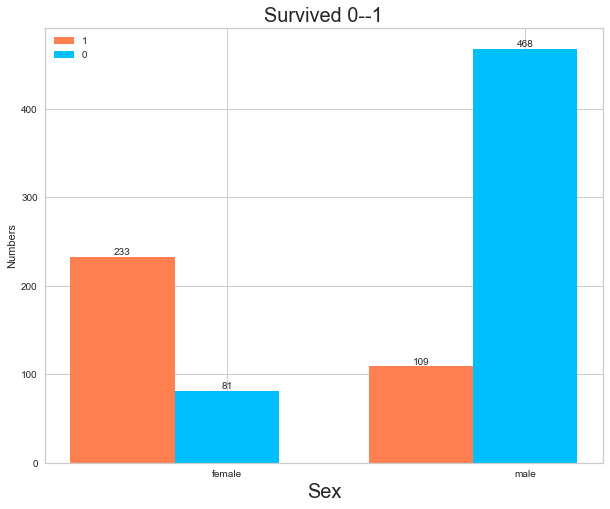

Pclass
{1: 136, 0: 80}
{0: 97, 1: 87}
{0: 372, 1: 119}


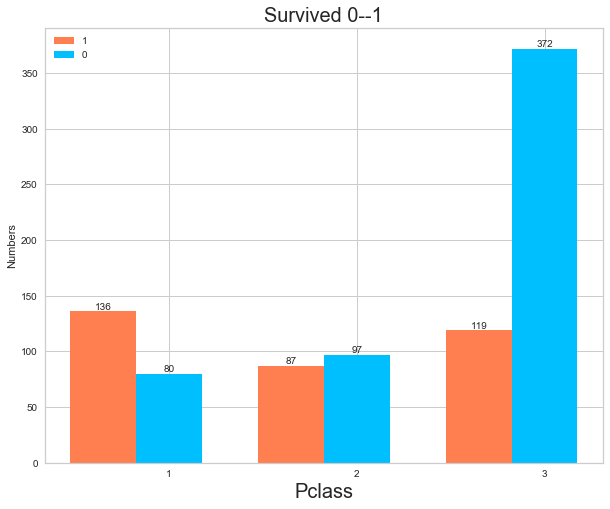

SibSp
{0: 398, 1: 210}
{1: 112, 0: 97}
{0: 15, 1: 13}
{0: 12, 1: 4}
{0: 15, 1: 3}
{0: 5}
{0: 7}


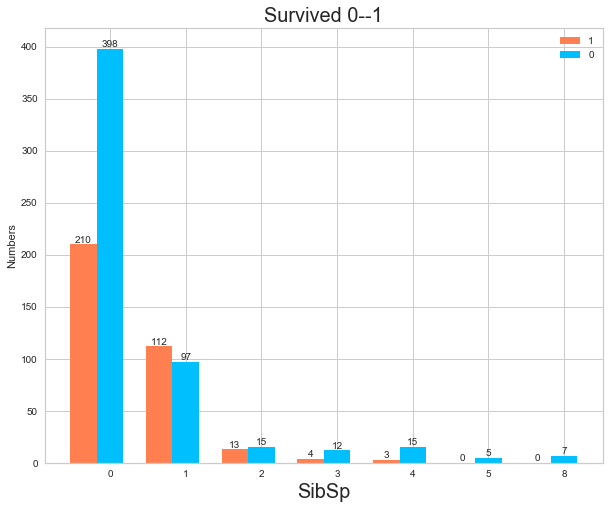

Parch
{0: 445, 1: 233}
{1: 65, 0: 53}
{1: 40, 0: 40}
{1: 3, 0: 2}
{0: 4}
{0: 4, 1: 1}


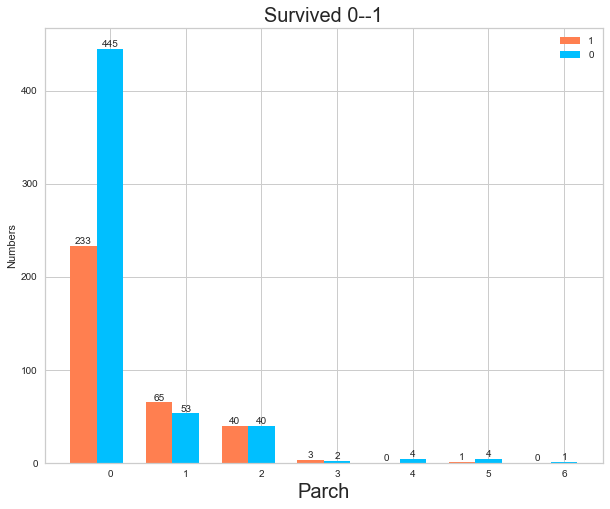

Cabin_label
{0: 8, 1: 7}
{1: 35, 0: 12}
{1: 35, 0: 24}
{1: 25, 0: 8}
{1: 24, 0: 8}
{1: 8, 0: 5}
{1: 2, 0: 2}
{0: 481, 1: 206}


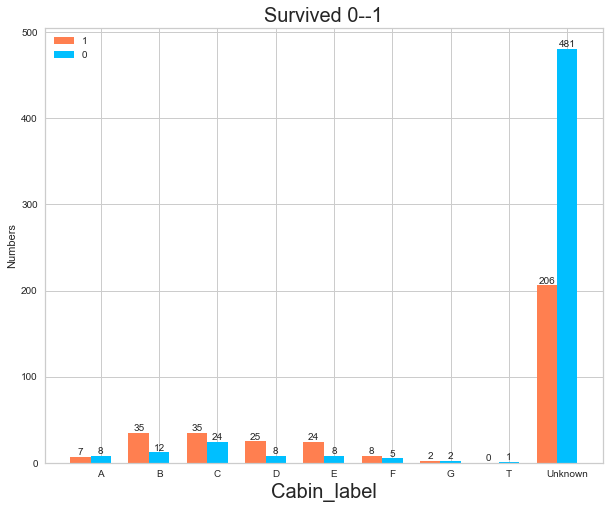

Name
{1: 1, 0: 1}
{0: 4, 1: 3}
{1: 1, 0: 1}
{1: 23, 0: 17}
{1: 127, 0: 55}
{1: 2}
{0: 436, 1: 81}
{1: 99, 0: 26}
{0: 6}


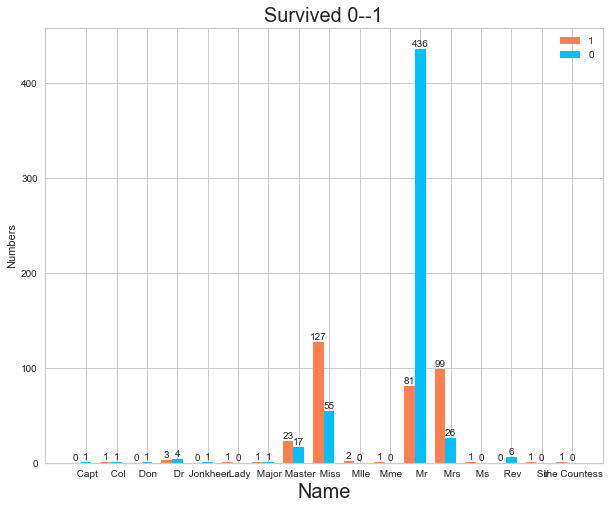

Ticket
{0: 351, 1: 130}
{1: 93, 0: 88}
{1: 66, 0: 35}
{1: 32, 0: 12}
{0: 14, 1: 7}
{0: 15, 1: 4}
{0: 19, 1: 5}
{0: 8, 1: 5}
{0: 7}


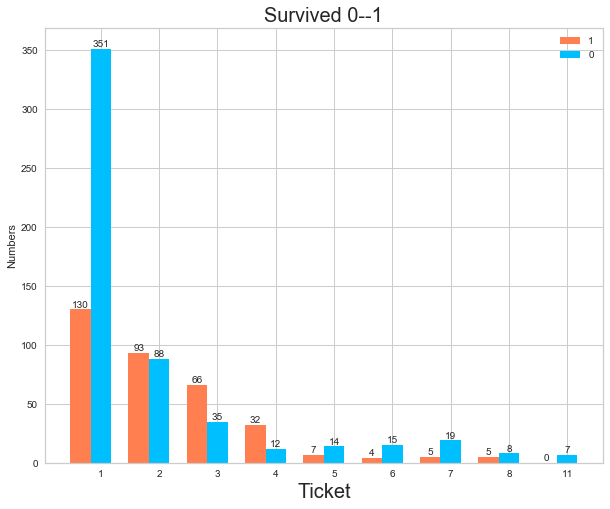

Family_size
{0: 374, 1: 163}
{1: 89, 0: 72}
{1: 59, 0: 43}
{1: 21, 0: 8}
{0: 12, 1: 3}
{0: 19, 1: 3}
{0: 8, 1: 4}
{0: 6}
{0: 7}


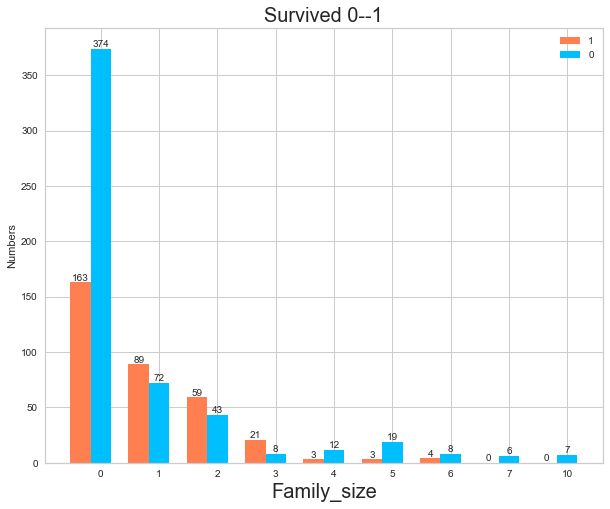

Title_group
{1: 23, 0: 18}
{1: 129, 0: 55}
{0: 436, 1: 81}
{1: 101, 0: 26}
{0: 13, 1: 5}
{1: 3, 0: 1}


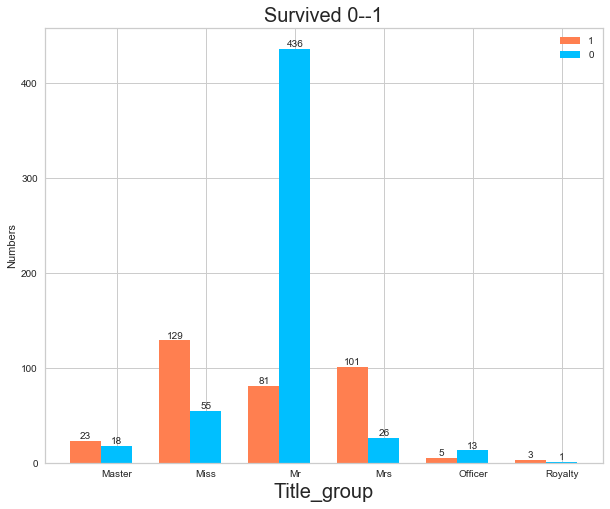

In [63]:
attr = ['Sex','Pclass','SibSp','Parch','Cabin_label','Name','Ticket','Family_size','Title_group']
for i in attr:
    print(i)
    df['Embarked'] = df['Embarked'].fillna('Unknown')
    df_2 = df.set_index(i)
    sur = []
    not_sur = []
    for j in sorted(set(df[i])):
        try:
            d = dict(df_2.loc[j,'Survived'].value_counts())
            print(d)
            try:
                sur.append(d[1])
            except:
                sur.append(0)
            try:
                not_sur.append(d[0])
            except:
                not_sur.append(0)
        except:
            d = df_2.loc[j,'Survived']
            if d == 0:
                not_sur.append(d+1)
                sur.append(0)
            else:
                sur.append(d)
                not_sur.append(0)
#     print(sur)
#     print(not_sur)
    ind = np.arange(len(set(df[i])))  # the x locations for the groups
#     print(ind)
    width = 0.35       # the width of the bars
    fig, ax = plt.subplots(figsize = (10,8))
    rects1 = ax.bar(ind, sur, width, color='coral')
    rects2 = ax.bar(ind + width, not_sur, width, color='deepskyblue')

    # add some text for labels, title and axes ticks
    ax.set_ylabel('Numbers')
    ax.set_xlabel(i,fontsize=20)
    ax.set_title('Survived 0--1',fontsize=20)
    ax.set_xticks(ind + width)
    ax.set_xticklabels(sorted(set(df[i])))
    ax.legend((rects1[0], rects2[0]), ['1', '0'])


    def autolabel(rects):
        # attach some text labels
        for rect in rects:
            height = rect.get_height()
            ax.text(rect.get_x() + rect.get_width()/2.,height,'%d' % int(height),ha='center', va='bottom')
    autolabel(rects1)
    autolabel(rects2)
    plt.show()


In [34]:
gg = [5,6,7,8]
for idx, ax in enumerate(gg):
    print(idx,ax)

0 5
1 6
2 7
3 8


Sex
{1: 0.7420382165605095, 0: 0.25796178343949044}
{0: 0.8110918544194108, 1: 0.18890814558058924}


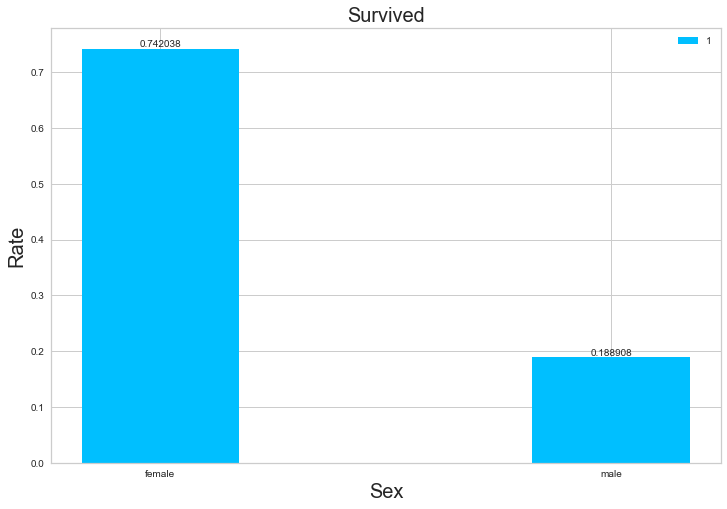

Pclass
{1: 0.6296296296296297, 0: 0.37037037037037035}
{0: 0.5271739130434783, 1: 0.47282608695652173}
{0: 0.7576374745417516, 1: 0.24236252545824846}


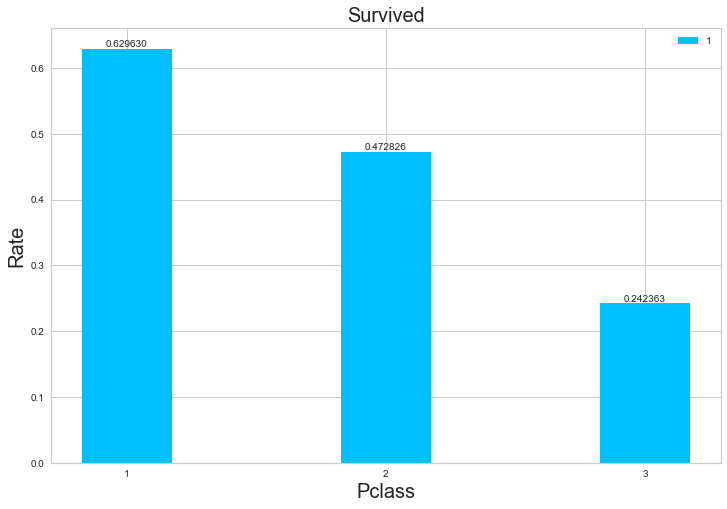

SibSp
{0: 0.6546052631578947, 1: 0.34539473684210525}
{1: 0.5358851674641149, 0: 0.46411483253588515}
{0: 0.5357142857142857, 1: 0.4642857142857143}
{0: 0.75, 1: 0.25}
{0: 0.8333333333333334, 1: 0.16666666666666666}
{0: 1.0}
{0: 1.0}


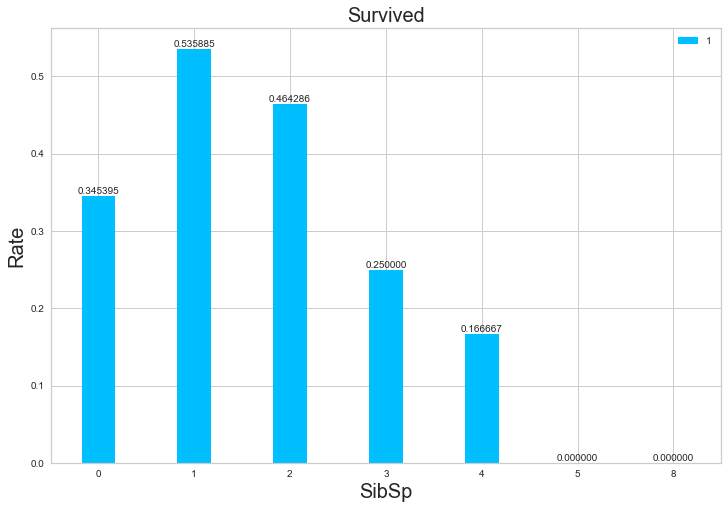

Parch
{0: 0.6563421828908554, 1: 0.34365781710914456}
{1: 0.5508474576271186, 0: 0.4491525423728814}
{1: 0.5, 0: 0.5}
{1: 0.6, 0: 0.4}
{0: 1.0}
{0: 0.8, 1: 0.2}


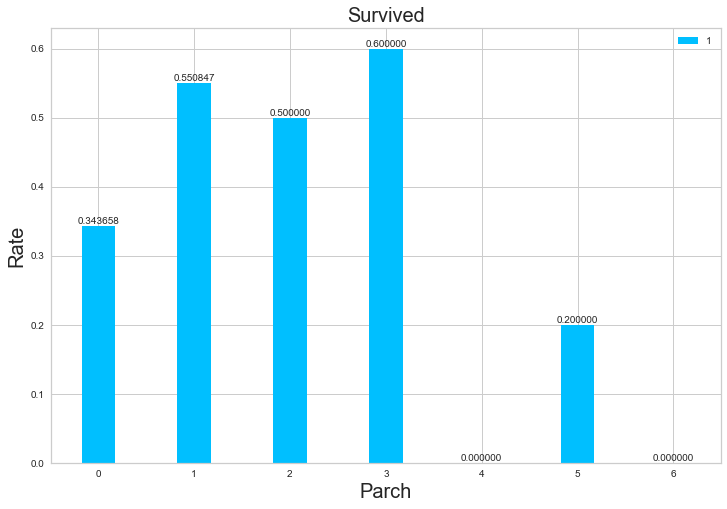

Cabin_label
{0: 0.5333333333333333, 1: 0.4666666666666667}
{1: 0.7446808510638298, 0: 0.2553191489361702}
{1: 0.5932203389830508, 0: 0.4067796610169492}
{1: 0.7575757575757576, 0: 0.24242424242424243}
{1: 0.75, 0: 0.25}
{1: 0.6153846153846154, 0: 0.38461538461538464}
{1: 0.5, 0: 0.5}
{0: 0.7001455604075691, 1: 0.29985443959243085}


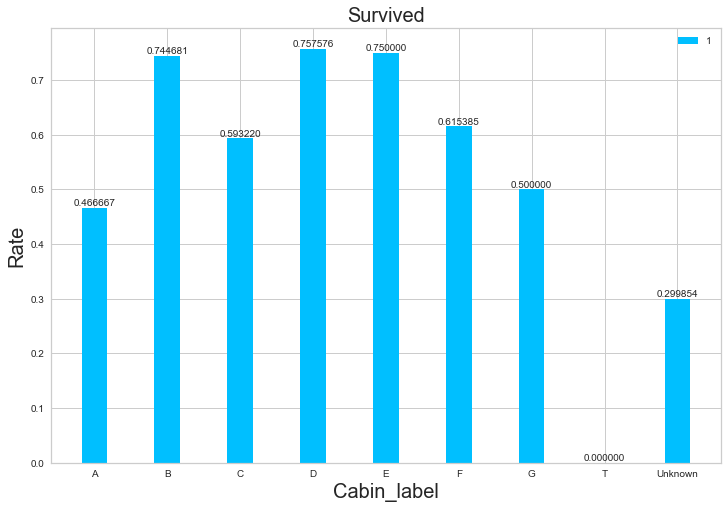

Ticket
{0: 0.7297297297297297, 1: 0.2702702702702703}
{1: 0.5138121546961326, 0: 0.4861878453038674}
{1: 0.6534653465346535, 0: 0.3465346534653465}
{1: 0.7272727272727273, 0: 0.2727272727272727}
{0: 0.6666666666666666, 1: 0.3333333333333333}
{0: 0.7894736842105263, 1: 0.21052631578947367}
{0: 0.7916666666666666, 1: 0.20833333333333334}
{0: 0.6153846153846154, 1: 0.38461538461538464}
{0: 1.0}


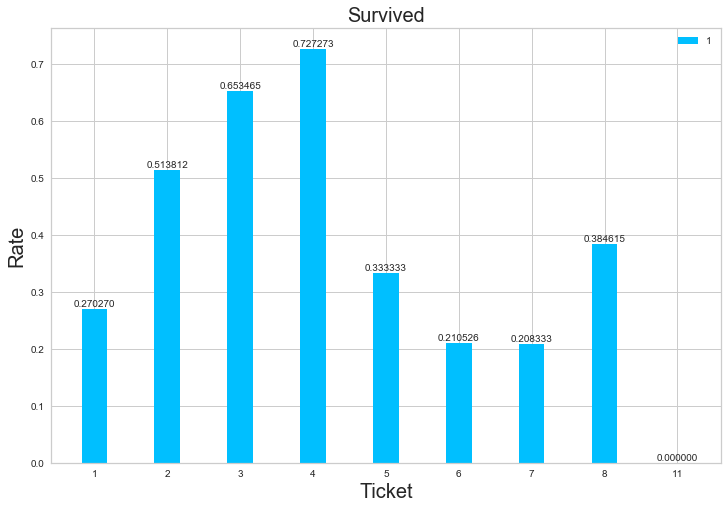

Family_size
{0: 0.6964618249534451, 1: 0.30353817504655495}
{1: 0.5527950310559007, 0: 0.4472049689440994}
{1: 0.5784313725490197, 0: 0.4215686274509804}
{1: 0.7241379310344828, 0: 0.27586206896551724}
{0: 0.8, 1: 0.2}
{0: 0.8636363636363636, 1: 0.13636363636363635}
{0: 0.6666666666666666, 1: 0.3333333333333333}
{0: 1.0}
{0: 1.0}


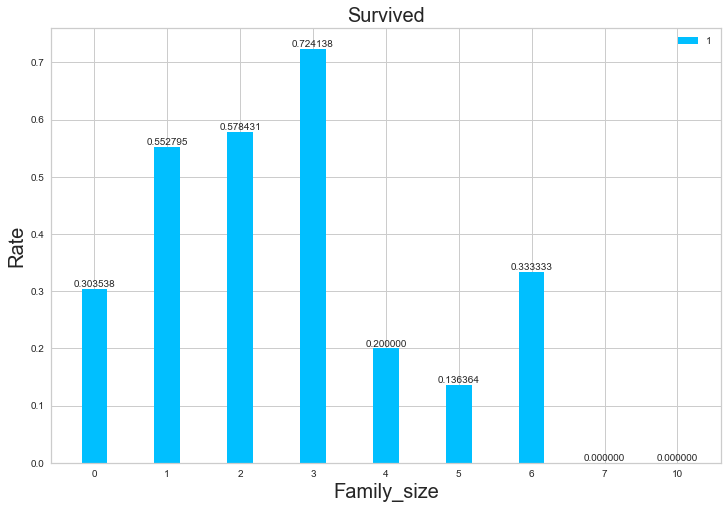

Title_group
{1: 0.5609756097560976, 0: 0.43902439024390244}
{1: 0.7010869565217391, 0: 0.29891304347826086}
{0: 0.8433268858800773, 1: 0.15667311411992263}
{1: 0.7952755905511811, 0: 0.2047244094488189}
{0: 0.7222222222222222, 1: 0.2777777777777778}
{1: 0.75, 0: 0.25}


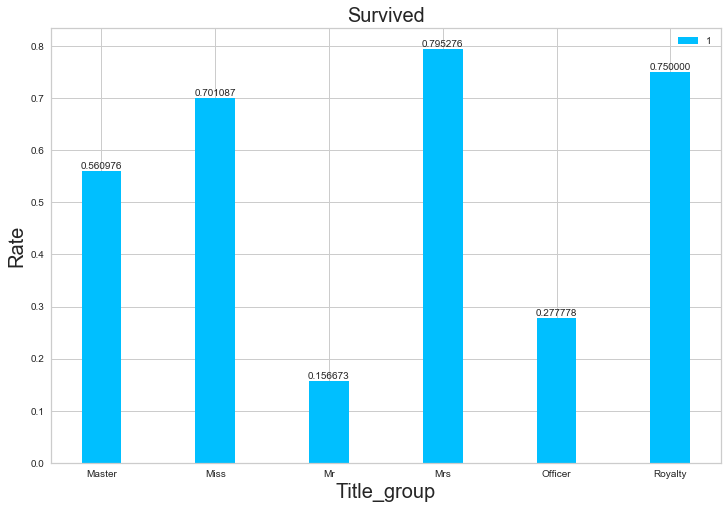

Ticket_group
{0: 0.6631419939577039, 1: 0.3368580060422961}
{1: 0.6758620689655173, 0: 0.32413793103448274}
{0: 0.75, 1: 0.25}


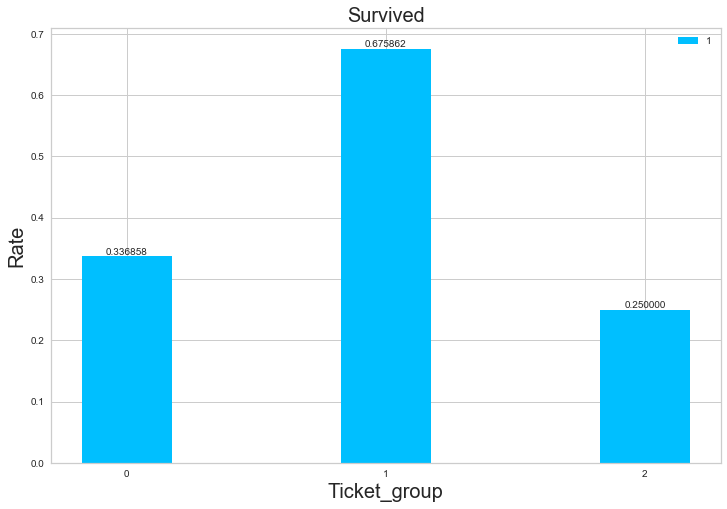

In [123]:
attr = ['Sex','Pclass','SibSp','Parch','Cabin_label','Ticket','Family_size','Title_group','Ticket_group']
color = ['coral','deepskyblue','lightyellow','lightgreen','seashell','gold','plum','moccasin','gray']
for i in attr:
# for index,i in enumerate(attr):
    print(i)
    df['Embarked'] = df['Embarked'].fillna('Unknown')
    df_2 = df.set_index(i)
    sur = []
    not_sur = []
    for j in sorted(set(df[i])):
        try:
#             d = dict(df_2.loc[j,'Survived'].value_counts()/sum(df_2.loc[j,'Survived'].value_counts()))
            d = dict(df_2.loc[j,'Survived'].value_counts(normalize = True))
            print(d)
            try:
                sur.append(d[1])
            except:
                sur.append(0)
            try:
                not_sur.append(d[0])
            except:
                not_sur.append(0)
        except:
            d = df_2.loc[j,'Survived']
            if d == 0:
#                 not_sur.append(d+1)
                sur.append(0)
            else:
                sur.append(d)
#                 not_sur.append(0)
#     print(sur)
#     print(not_sur)
    ind = np.arange(len(set(df[i])))  # the x locations for the groups
#     print(ind)
    width = 0.35       # the width of the bars
    fig, ax = plt.subplots(figsize = (12,8))
    rects1 = ax.bar(ind + width, sur, width, color='deepskyblue')
#     rects2 = ax.bar(ind + width, not_sur, width, color='deepskyblue')

    # add some text for labels, title and axes ticks
    ax.set_ylabel('Rate',fontsize=20)
    ax.set_xlabel(i,fontsize=20)
    ax.set_title('Survived',fontsize=20)
    ax.set_xticks(ind + width)
    ax.set_xticklabels(sorted(set(df[i])))
    ax.legend('1')


    def autolabel(rects):
        # attach some text labels
        for rect in rects:
            height = rect.get_height()
            ax.text(rect.get_x() + rect.get_width()/2.,height,'%f' % float(height),ha='center', va='bottom')
    autolabel(rects1)
#     autolabel(rects2)
    plt.show()


In [55]:
df.head()

,ID,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Cabin_label,Family_size,Ticket_group,Fare_group,Age_group
0,0,0,3,Mr,male,22,1,0,1,7.2500,0,S,Unknown,1,0,0,1
1,1,1,1,Mrs,female,38,1,0,2,71.2833,1,C,C,1,0,2,1
2,2,1,3,Miss,female,26,0,0,1,7.9250,0,S,Unknown,0,0,0,1
3,3,1,1,Mrs,female,35,1,0,2,53.1000,1,S,C,1,0,2,1
4,4,0,3,Mr,male,35,0,0,1,8.0500,0,S,Unknown,0,0,0,1


{0: 125, 1: 52}
{1: 38, 0: 26}
{0: 71, 1: 44}
{0: 146, 1: 84}
{0: 86, 1: 69}
{0: 53, 1: 33}
{0: 25, 1: 17}
{0: 17, 1: 5}
[0 1 2 3 4 5 6 7]
[38, 44, 84, 69, 33, 17, 5]


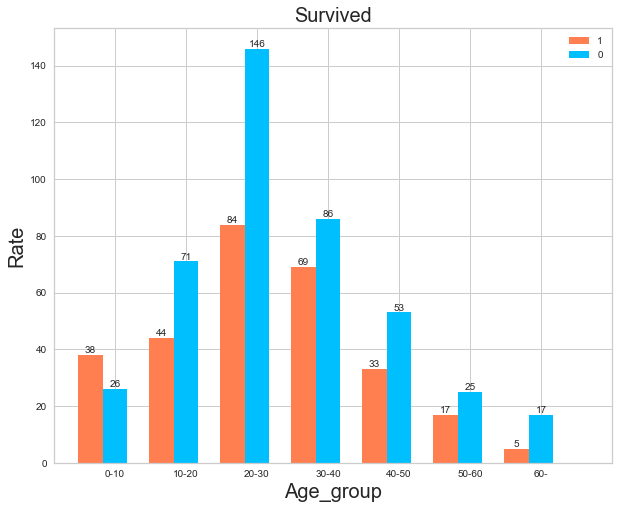

In [38]:
df_2 = df.set_index('Age_group')
sur = []
not_sur = []
for j in sorted(set(df['Age_group'])):
    try:
#         d = dict(df_2.loc[j,'Survived'].value_counts()/sum(df_2.loc[j,'Survived'].value_counts()))
        d = dict(df_2.loc[j,'Survived'].value_counts(normalize = False))
        print(d)
        try:
            sur.append(d[1])
        except:
            sur.append(0)
        try:
            not_sur.append(d[0])
        except:
            not_sur.append(0)
    except:
        d = df_2.loc[j,'Survived']
        if d == 0:
            not_sur.append(d+1)
            sur.append(0)
        else:
            sur.append(d)
            not_sur.append(0)
#     print(sur)
#     print(not_sur)
ind = np.arange(len(set(df['Age_group'])))
print(ind)# the x locations for the groups
#     print(ind)
width = 0.35       # the width of the bars
fig, ax = plt.subplots(figsize = (10,8))
print(sur[1:])
rects1 = ax.bar(ind[:-1], sur[1:], width, color='coral')
rects2 = ax.bar(ind[:-1]+ width, not_sur[1:], width, color='deepskyblue')

# add some text for labels, title and axes ticks
ax.set_ylabel('Rate',fontsize=20)
ax.set_xlabel('Age_group',fontsize=20)
ax.set_title('Survived',fontsize=20)
ax.set_xticks(ind + width)
ax.set_xticklabels(['0-10','10-20','20-30','30-40','40-50','50-60','60-'])
ax.legend((rects1[0], rects2[0]), ['1', '0'])


def autolabel(rects):
    # attach some text labels
    for rect in rects:
        height = rect.get_height()
        ax.text(rect.get_x() + rect.get_width()/2.,height,'%d' % float(height),ha='center', va='bottom')
autolabel(rects1)
autolabel(rects2)
plt.show()

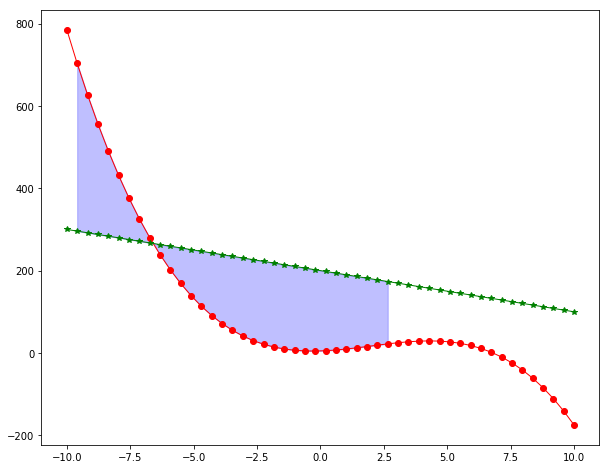

In [53]:
def func(x):
    return 5+2*x+3*x**2-0.5*x**3

def fund(x):
    return 200-10*x

#np.linspace()取x的值
x=np.linspace(-10,10,50)
y=func(x)
y1=fund(x)

fig,ax=plt.subplots(figsize = (10,8))
plt.plot(x,y,'r-o',lw=1)
plt.plot(x,y1,'g-*',lw=1)
#plt.ylim(ymin=0)  控制y轴现实范围
a,b=-10,3
xf=x[np.where((x>a)&(x<b))]
#plt.fill_between(xf),在xf范围内
# #曲线1：np.zeros(len(xf))与曲线2：func(xf)之间的区域
# #np.zeros()从零开始，np.ones()从1开始，np.ones()*20从20开始 #plt.fill_between(xf, np.zeros(len(xf)), func(xf), color='blue', alpha=.25)
# #两条曲线之间的区域
plt.fill_between(xf,func(xf),fund(xf),color='blue',alpha=0.25)
plt.show()

In [85]:
df['Embarked'].loc[:]

0    S
1    C
Name: Embarked, dtype: object

In [108]:
df['Embarked'].dropna()

0      S
1      C
2      S
3      S
4      S
5      Q
6      S
7      S
8      S
9      C
10     S
11     S
12     S
13     S
14     S
15     S
16     Q
17     S
18     S
19     C
20     S
21     S
22     Q
23     S
24     S
25     S
26     C
27     S
28     Q
29     S
      ..
861    S
862    S
863    S
864    S
865    S
866    C
867    S
868    S
869    S
870    S
871    S
872    S
873    S
874    C
875    C
876    S
877    S
878    S
879    C
880    S
881    S
882    S
883    S
884    S
885    Q
886    S
887    S
888    S
889    C
890    Q
Name: Embarked, Length: 889, dtype: object

{nan, 'S', 'C', 'Q'}
['C', 'Q', 'S']
{1: 0.5535714285714286, 0: 0.44642857142857145}
{0: 0.6103896103896104, 1: 0.38961038961038963}
{0: 0.6630434782608695, 1: 0.33695652173913043}


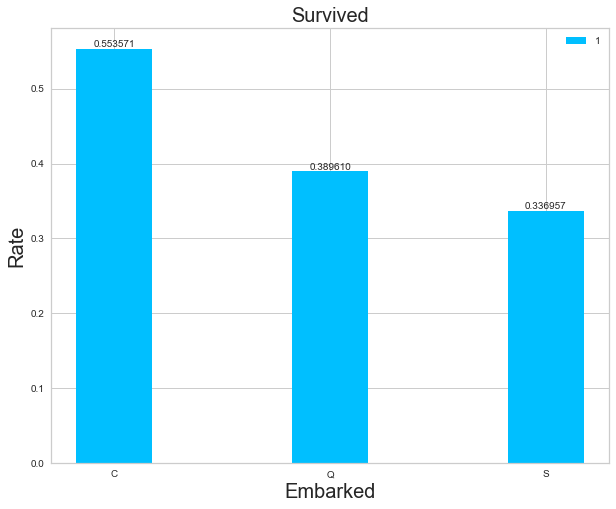

In [106]:
print(set(df['Embarked']))
list(set(df['Embarked']))[1:]
print(sorted(list(set(df['Embarked']))[1:]))
df_2 = df.set_index('Embarked')
sur = []
not_sur = []
for j in sorted(list(set(df['Embarked']))[1:]):
    try:
        d = dict(df_2.loc[j,'Survived'].value_counts()/sum(df_2.loc[j,'Survived'].value_counts()))
        print(d)
        try:
            sur.append(d[1])
        except:
            sur.append(0)
#         try:
#             not_sur.append(d[0])
#         except:
#             not_sur.append(0)
    except:
        d = df_2.loc[j,'Survived']
        if d == 0:
#             not_sur.append(d+1)
            sur.append(0)
        else:
            sur.append(d)
#             not_sur.append(0)
#     print(sur)
#     print(not_sur)
ind = np.arange(len(list(set(df['Embarked']))[1:]))  # the x locations for the groups
#     print(ind)
width = 0.35       # the width of the bars
fig, ax = plt.subplots(figsize = (10,8))
rects1 = ax.bar(ind+ width, sur, width, color='deepskyblue')
# rects2 = ax.bar(ind + width, not_sur, width, color='deepskyblue')

# add some text for labels, title and axes ticks
ax.set_ylabel('Rate',fontsize=20)
ax.set_xlabel('Embarked',fontsize=20)
ax.set_title('Survived',fontsize=20)
ax.set_xticks(ind + width)
ax.set_xticklabels(sorted(list(set(df['Embarked']))[1:]))
ax.legend('1')


def autolabel(rects):
    # attach some text labels
    for rect in rects:
        height = rect.get_height()
        ax.text(rect.get_x() + rect.get_width()/2.,height,'%f' % float(height),ha='center', va='bottom')
autolabel(rects1)
# autolabel(rects2)
plt.show()

In [126]:
df['Embarked'].value_counts()

S          644
C          168
Q           77
Unknown      2
Name: Embarked, dtype: int64

In [155]:
df['Embarked'].loc[df['Embarked'].isin(['Unknown'])]

61     Unknown
829    Unknown
Name: Embarked, dtype: object

In [156]:
df.loc[df['Embarked'].isin(['Unknown']),'Embarked'].keys()

Int64Index([61, 829], dtype='int64')

In [15]:
df['Embarked'].drop(df.loc[df['Embarked'].isin(['Unknown']),'Embarked'].keys(), axis = 0)

0      S
1      C
2      S
3      S
4      S
5      Q
6      S
7      S
8      S
9      C
10     S
11     S
12     S
13     S
14     S
15     S
16     Q
17     S
18     S
19     C
20     S
21     S
22     Q
23     S
24     S
25     S
26     C
27     S
28     Q
29     S
      ..
861    S
862    S
863    S
864    S
865    S
866    C
867    S
868    S
869    S
870    S
871    S
872    S
873    S
874    C
875    C
876    S
877    S
878    S
879    C
880    S
881    S
882    S
883    S
884    S
885    Q
886    S
887    S
888    S
889    C
890    Q
Name: Embarked, Length: 891, dtype: object